# **SÉRIES TEMPORAIS**
*   ### **Case**: *Energia Renovável*



### Instalação de bibliotecas

In [1]:
# # Apenas a biblioteca pmdarima precisa ser instalada; as demais utilizadas neste notebook já vêm pré-instaladas no Google Colab
# ! pip install pmdarima

### Carregamento de bibliotecas

In [2]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller        # Teste de estacionariedade de Dickey-Fuller
from pmdarima import auto_arima                       # Ajuste automático de modelo ARIMA
import statsmodels.formula.api as smf                 # Ajuste de modelos de regressão

### Leitura da base de dados

In [3]:
dados_energia = pd.read_table("../Dados/Energia.txt", sep = "\t")

### Visualização da base de dados

In [4]:
display(dados_energia)

,QUINZENA,CAPACIDADE_INSTALADA_MW,CONSUMO_GWH
0,1,0.03,0.93
1,2,9.32,3.22
2,3,41.94,19.14
3,4,22.13,21.67
4,5,27.07,18.53
5,6,56.44,13.46
6,7,40.37,10.63
7,8,16.76,10.30
8,9,30.01,16.30
9,10,37.87,22.46


### Definição das séries

In [5]:
# Série de consumo (resposta)
serie_consumo = pd.Series(dados_energia['CONSUMO_GWH'])

In [6]:
# Série de capacidade instalada (explicativa)
serie_capacidade = pd.Series(dados_energia['CAPACIDADE_INSTALADA_MW'])

### Análise exploratória das séries

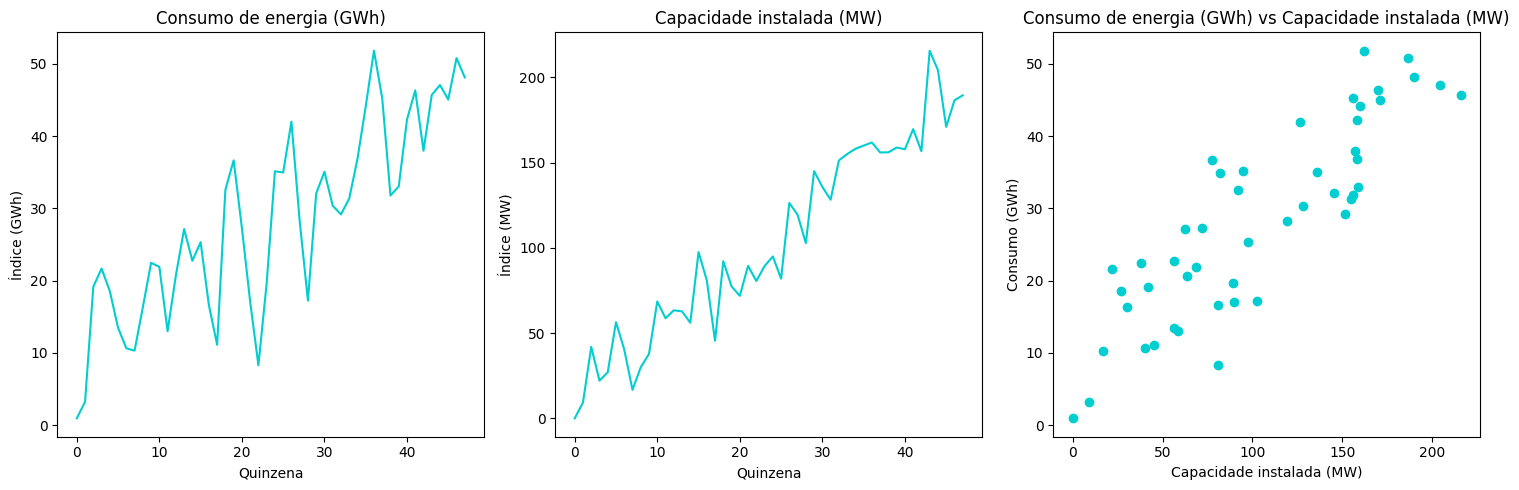

In [7]:
### Gráficos individuais das séries e gráfico de dispersão
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(serie_consumo, color='darkturquoise', linewidth=1.5)
plt.title("Consumo de energia (GWh)")
plt.xlabel("Quinzena")
plt.ylabel("Índice (GWh)")

plt.subplot(1, 3, 2)
plt.plot(serie_capacidade, color='darkturquoise', linewidth=1.5)
plt.title("Capacidade instalada (MW)")
plt.xlabel("Quinzena")
plt.ylabel("Índice (MW)")

plt.subplot(1, 3, 3)
plt.scatter(dados_energia['CAPACIDADE_INSTALADA_MW'], dados_energia['CONSUMO_GWH'], color='darkturquoise')
plt.title("Consumo de energia (GWh) vs Capacidade instalada (MW)")
plt.xlabel("Capacidade instalada (MW)")
plt.ylabel("Consumo (GWh)")

plt.tight_layout()
plt.show()

In [8]:
# Teste de estacionariedade de Dickey-Fuller para série de consumo de energia
adf = adfuller(serie_consumo, autolag = 'AIC')
print(f'Estatística do teste: {round(adf[0], 3)}')
print(f'p-valor: {round(adf[1], 3)}')

Estatística do teste: 0.248
p-valor: 0.975


In [9]:
# Teste de estacionariedade de Dickey-Fuller para série de capacidade instalada
adf = adfuller(serie_capacidade, autolag = 'AIC')
print(f'Estatística do teste: {round(adf[0], 3)}')
print(f'p-valor: {round(adf[1], 3)}')

Estatística do teste: -0.536
p-valor: 0.885


### Modelo da classe (S)ARIMA

In [10]:
# Ajuste do melhor modelo
modelo_arima = auto_arima(serie_consumo, stepwise = False)
print(modelo_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(0, 1, 4)   Log Likelihood                -145.561
Date:                Fri, 13 Sep 2024   AIC                            303.122
Time:                        00:48:07   BIC                            314.223
Sample:                             0   HQIC                           307.300
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7846      0.113      6.913      0.000       0.562       1.007
ma.L1         -0.2818      0.130     -2.171      0.030      -0.536      -0.027
ma.L2         -1.1959      0.191     -6.259      0.0

### Modelo de regressão linear simples

In [11]:
# Ajuste do modelo de regressão linear simples
modelo_lin = smf.ols('CONSUMO_GWH ~ CAPACIDADE_INSTALADA_MW', data = dados_energia).fit()
print(modelo_lin.summary())

                            OLS Regression Results                            
Dep. Variable:            CONSUMO_GWH   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     135.1
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           2.75e-15
Time:                        00:48:07   Log-Likelihood:                -158.75
No. Observations:                  48   AIC:                             321.5
Df Residuals:                      46   BIC:                             325.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### Modelo de regressão linear temporal com erros (S)ARIMA

In [12]:
# Ajuste do melhor modelo
modelo_lin_arima = auto_arima(y = serie_consumo, X = np.array(serie_capacidade).reshape(-1, 1), stepwise = False)
print(modelo_lin_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -118.919
Date:                Fri, 13 Sep 2024   AIC                            251.837
Time:                        00:48:09   BIC                            264.936
Sample:                             0   HQIC                           256.787
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.9105      3.082      3.540      0.000       4.869      16.952
x1             0.2015      0.012     17.343      0.000       0.179       0.224
ar.L1          0.3411      0.173      1.971      0.0

### Comparação visual dos modelos

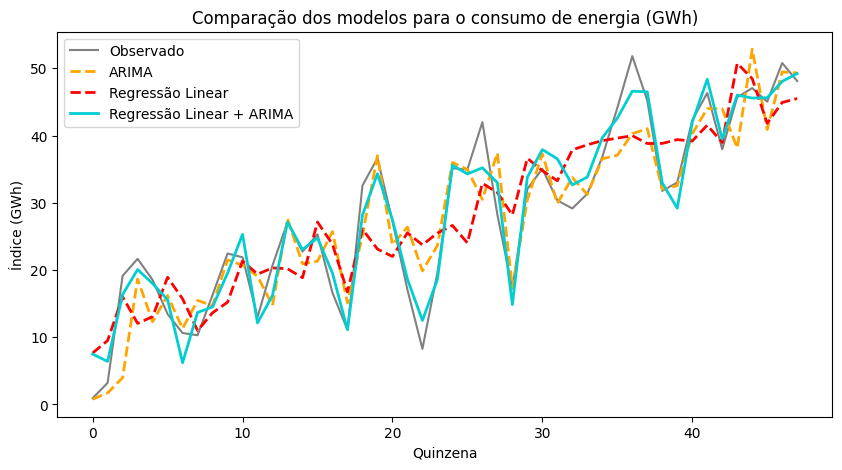

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(serie_consumo, color = 'grey', linewidth = 1.5, label = 'Observado')
plt.plot(modelo_arima.predict_in_sample(), color = 'orange', linestyle = '--', linewidth = 2, label = 'ARIMA')
plt.plot(modelo_lin.fittedvalues, color = 'red', linestyle = '--', linewidth = 2, label = 'Regressão Linear')
plt.plot(modelo_lin_arima.predict_in_sample(X = np.array(serie_capacidade).reshape(-1, 1)), color = 'darkturquoise', linewidth = 2, label = 'Regressão Linear + ARIMA')

plt.title("Comparação dos modelos para o consumo de energia (GWh)")
plt.xlabel("Quinzena")
plt.ylabel("Índice (GWh)")
plt.legend()
plt.show()

### Diagnóstico dos modelos

In [14]:
# Cálculo do REQM para modelo da classe (S)ARIMA
np.sqrt(np.mean((modelo_arima.resid())**2))

5.433800987293624

In [15]:
# Cálculo do REQM para modelo de regressão linear simples
np.sqrt(np.mean((modelo_lin.resid)**2))

6.609108446360924

In [16]:
# Cálculo do REQM para modelo de regressão linear temporal com erros (S)ARIMA
np.sqrt(np.mean((modelo_lin_arima.resid())**2))

2.9394486691225574

### Previsões do melhor modelo

In [17]:
# Salvando num objeto à parte os índices de capacidade instalada para as próximas duas quinzenas
dados_xreg = np.array([200, 230]).reshape(-1, 1)

In [18]:
# Previsões para as próximas duas quinzenas
previsoes = modelo_lin_arima.predict(n_periods = 2, X = dados_xreg)
print(np.round(previsoes, 1))

48    43.9
49    49.5
dtype: float64


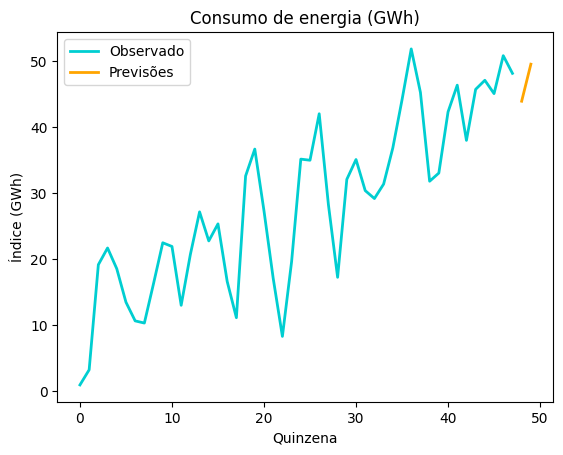

In [19]:
# Gráfico da série de consumo, incluindo previsões
n_obs = len(serie_consumo)
plt.plot(range(n_obs), serie_consumo, color = 'darkturquoise', linewidth = 2, label = "Observado")
plt.plot(range(n_obs, n_obs + len(previsoes)), previsoes, color = 'orange', linewidth = 2, label = "Previsões")

plt.title("Consumo de energia (GWh)")
plt.xlabel("Quinzena")
plt.ylabel("Índice (GWh)")
plt.legend()
plt.show()